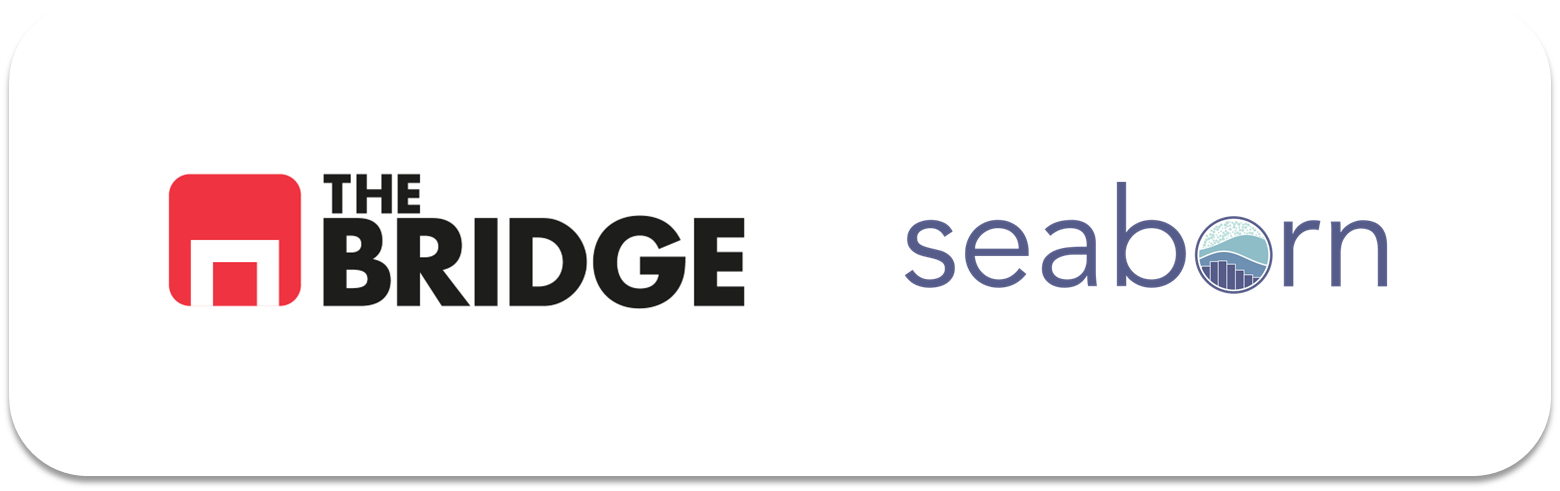

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
ciudades_california = pd.read_csv("./data/california_cities.csv")
ciudades_california

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [3]:
# borramos las filas con nulos:
df_ciudades_california = ciudades_california.copy() # nos hacemos una copia del df original
df_ciudades_california.drop(columns=["area_water_km2", "elevation_m", "elevation_ft", "area_total_sq_mi", "area_water_sq_mi", "area_total_km2", 
"area_land_km2", "area_water_percent"], inplace=True) # elegimos las columnas a eliminar y 
# usamos el inplace para quitarlas
df_ciudades_california # vemos nuestro df sin las columnas

,Unnamed: 0,city,latd,longd,population_total,area_land_sq_mi
0,0,Adelanto,34.576111,-117.432778,31765,56.009
1,1,AgouraHills,34.153333,-118.761667,20330,7.793
2,2,Alameda,37.756111,-122.274444,75467,10.611
3,3,Albany,37.886944,-122.297778,18969,1.788
4,4,Alhambra,34.081944,-118.135000,83089,7.631
...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,2933,1.531
478,478,Yreka,41.726667,-122.637500,7765,9.980
479,479,YubaCity,39.134722,-121.626111,64925,14.578
480,480,Yucaipa,34.030278,-117.048611,51367,27.888


In [4]:
df_ciudades_california.info() # aqui el df está sin nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        482 non-null    int64  
 1   city              482 non-null    object 
 2   latd              482 non-null    float64
 3   longd             482 non-null    float64
 4   population_total  482 non-null    int64  
 5   area_land_sq_mi   482 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 22.7+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [5]:

# creamos funcion con 6 argumentos:
def scatter_funcion(df, col_num_x, col_num_y, col_categ = None, tamaño=50, escala=1): # damos los 6 argumentos
    plt.figure(figsize=(12, 10)) # tamaño del scatter
    sns.scatterplot( # pintamos scatter con los argumentos
        data=df, # el df que usaremos
        x=col_num_x, # eje x
        y=col_num_y, # eje y
        hue=col_categ, # color de los puntos
        s= tamaño) # tamaños de los puntos

    plt.xlabel(col_num_x)
    plt.ylabel(col_num_y) 
    plt.title("Diagrama de dispersión de longitud y latitud") 
    plt.show();



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

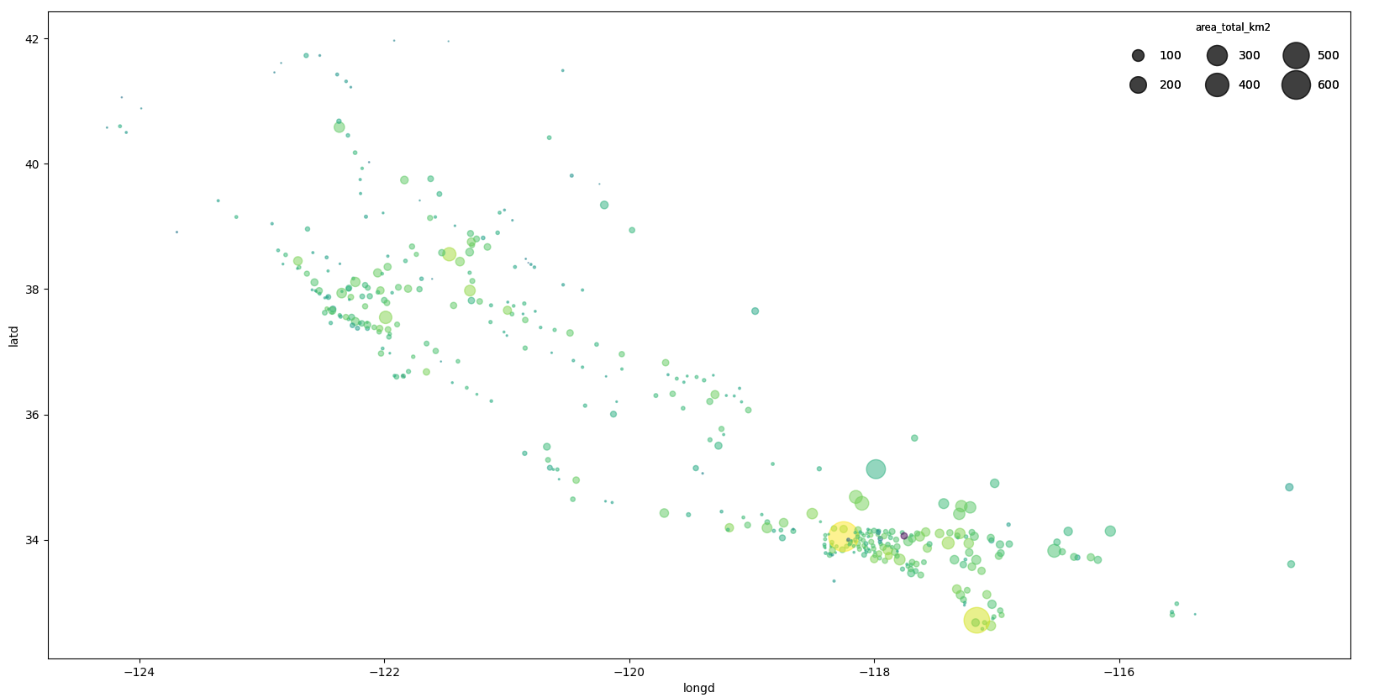

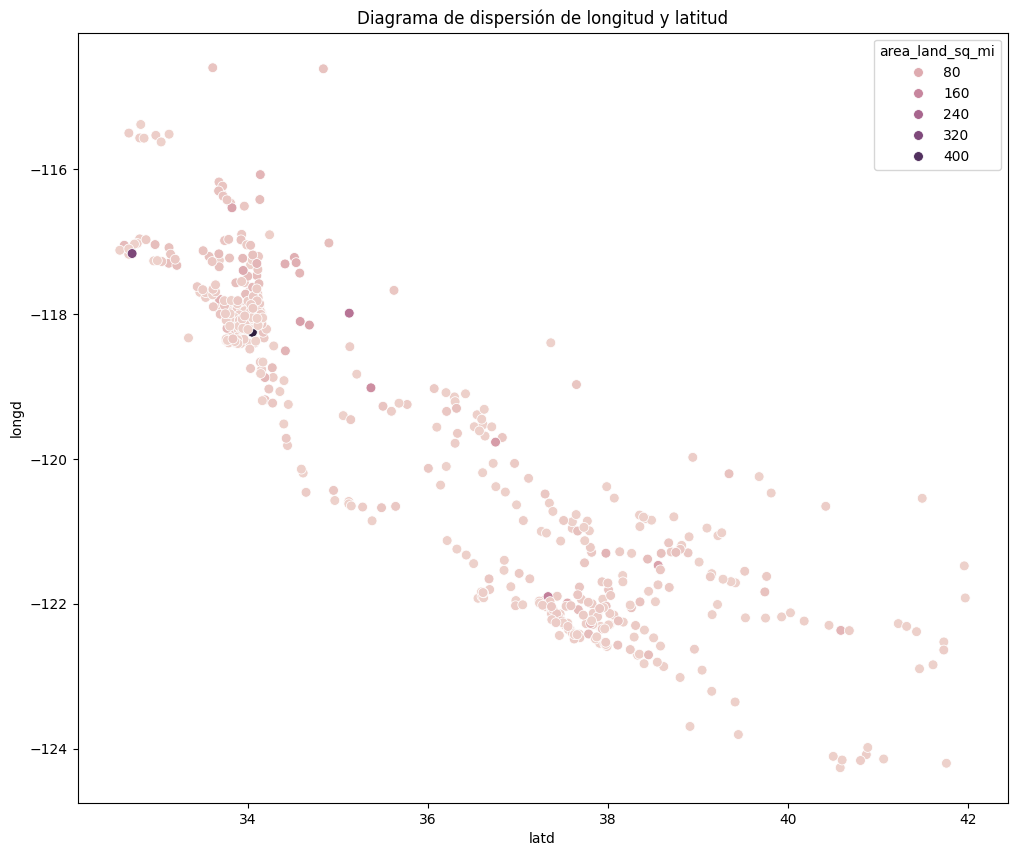

In [6]:
scatter_funcion(df_ciudades_california, "latd", "longd", col_categ="area_land_sq_mi", tamaño=50, escala=1/50)
# el punto 5 y 6 aunque los he definido en la función, no sé cómo usarlos en la misma,
# he dejado el tamaño como valor fijo

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

In [7]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


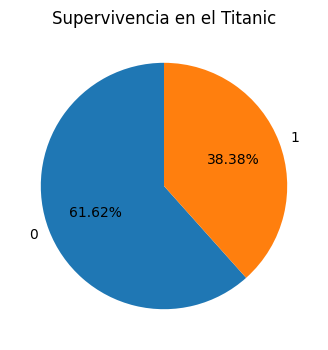

In [16]:
# 1. gráfico de mortalidad
data = df_titanic["survived"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))
ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%',
        startangle= 90)

plt.title("Supervivencia en el Titanic")
plt.show()
fig.savefig("./image/tarta_supervivencia_titanic.png")
plt.close(fig);

In [10]:
# 2. Sobrevivientes mujeres y niños primero

# Obtenemos las frecuencias absolutas y relativas de la variable/columna "who" del dataset df_titanic

frecuencias_absolutas = df_titanic["who"].value_counts()
frecuencias_relativas = df_titanic["who"].value_counts(normalize = True) *  100

print(frecuencias_absolutas)
print(frecuencias_relativas)


who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


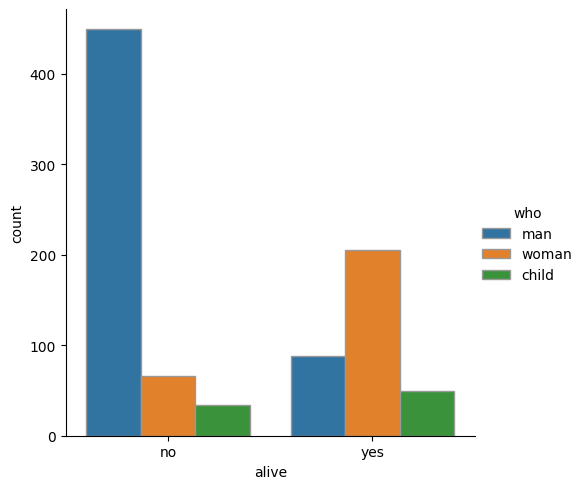

In [28]:
# vemos quienes sobrevivieron respecto a mujeres, niños y hombres:

sns.catplot(x="alive",
            hue = "who",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df_titanic);

fig.savefig("./image/barras_supervivencia_por_persona.png")
plt.close(fig) 


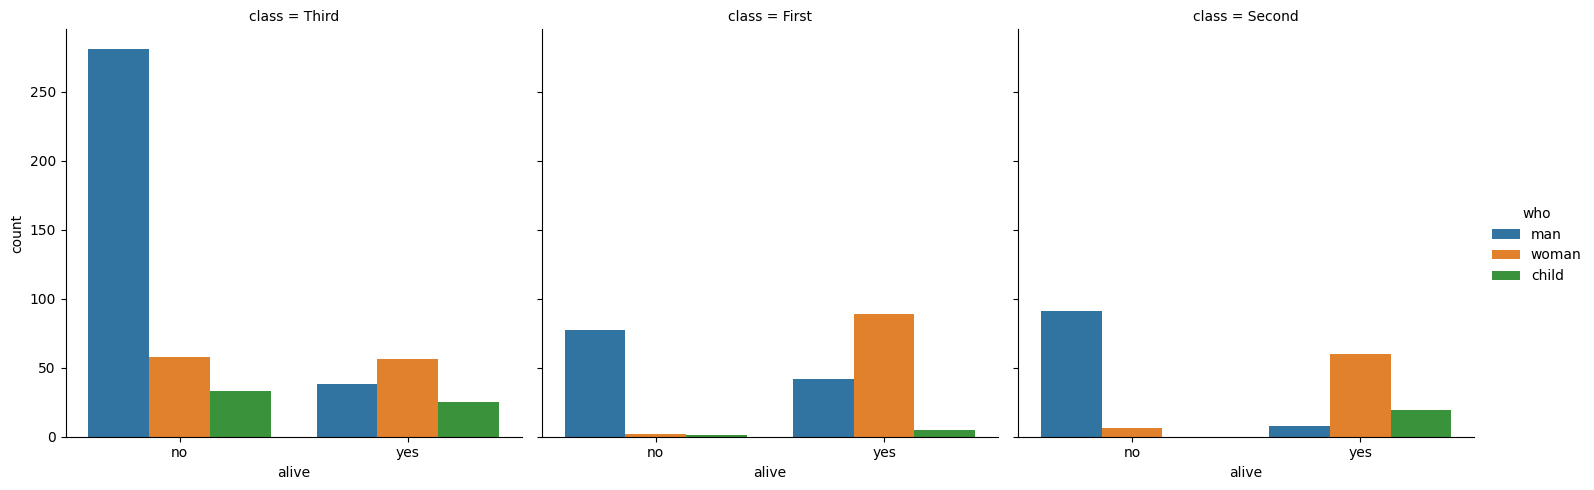

In [11]:
# 3. Y vemos quienes sobrevivieron respecto a las clases:
sns.catplot(x= "alive", col = "class", hue = "who", data = df_titanic, kind = "count");

fig.savefig("./image/barras_supervivencia_por_persona_clase.png")
plt.close(fig) 

In [12]:
# 4. las diferencias entre tasas de supervivencia de mujeres y niños.
# who y alive:

tabla_contingencia = pd.crosstab(df_titanic["who"],
                                 df_titanic["alive"],
                                 margins=False)
tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


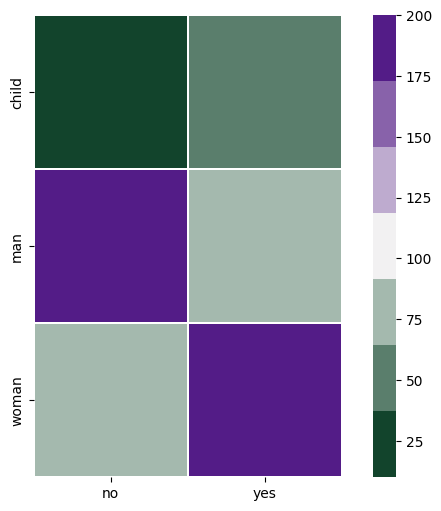

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(tabla_contingencia,
            vmin = 10,
            vmax = 200,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square = True,
            linewidths=.1,
            annot=False);
plt.xlabel("")
plt.ylabel("");

fig.savefig("./image/mapa_calor_supervivencia_persona.png")
plt.close(fig) 

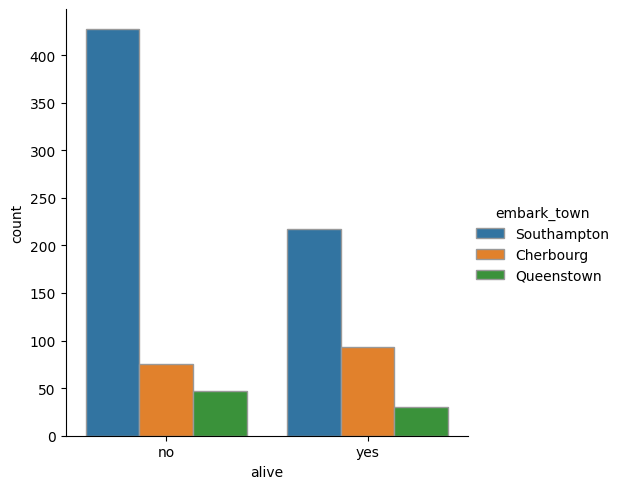

In [32]:
# 5. Supervivencia según puerto de embarque
sns.catplot(x="alive",
            hue = "embark_town",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df_titanic);
fig.suptitle("Supervivencia según el puerto de embarque");

fig.savefig("./image/barras_supervivencia_puerto_embarque.png")
plt.close(fig);

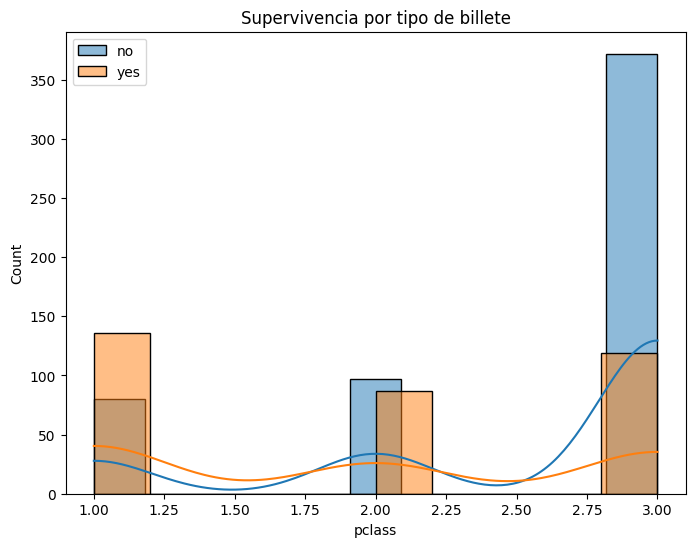

In [19]:
# supervivencia por tipo de clase del billete

variable_categorica = "alive"
variable_numerica = "pclass"

plt.figure(figsize=(8,6))
for valor in df_titanic[variable_categorica].unique():  
    sns.histplot(df_titanic.loc[df_titanic[variable_categorica] == valor,variable_numerica], kde= True, label=valor)
plt.legend();
plt.title("Supervivencia por tipo de billete");

fig.savefig("./image/histograma_supervivencia_tipo_billete.png")
plt.close(fig);

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)